<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/Time_Series_Prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using LSTM To Predict Twelve Months Ahead Using The Air Passengers Dataset 

In [21]:
# Install dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout
import pandas.util.testing as tm
import warnings
warnings.filterwarnings("ignore")


In [22]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving datasets_62956_121905_AirPassengers.csv to datasets_62956_121905_AirPassengers.csv


In [23]:
df = pd.read_csv('datasets_62956_121905_AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index('Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
train, test = df[:-12], df[-12:]

In [26]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [27]:
n_input = 12 
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
20/20 [==============================] - 1s 40ms/step - loss: 0.0609
Epoch 2/180
20/20 [==============================] - 0s 22ms/step - loss: 0.0119
Epoch 3/180
20/20 [==============================] - 0s 21ms/step - loss: 0.0099
Epoch 4/180
20/20 [==============================] - 0s 20ms/step - loss: 0.0102
Epoch 5/180
20/20 [==============================] - 0s 21ms/step - loss: 0.0101
Epoch 6/180
20/20 [==============================] - 0s 20ms/step - loss: 0.0115
Epoch 7/180
20/20 [==============================] - 0s 20ms/step - loss: 0.0092
Epoch 8/180
20/20 [==============================] - 0s 23ms/step - loss: 0.0151
Epoch 9/180
20/20 [==============================] - 0s 22ms/step - loss: 0.0113
Epoch 10/180
20/20 [==============================] - 0s 20ms/step - loss: 0.0123
Epoch 11/180
20/20 [==============================] - 0s 20ms/step - loss: 0.0085
Epoch 12/180
20/20 [==============================] - 0s 20ms/step - loss: 0.0084
Epoch 13/180
20/20 [=====

In [28]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
  pred_list.append(model.predict(batch)[0])
  batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)

In [29]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

df_test = pd.concat([df, df_predict], axis=1)

In [31]:
df_test.tail(13)

,#Passengers,Predictions
Month,,
1959-12-01,405,NaN
1960-01-01,417,380.547132
1960-02-01,391,377.797451
1960-03-01,419,411.693090
1960-04-01,461,414.036350
1960-05-01,472,443.441170
1960-06-01,535,512.573647
1960-07-01,622,581.472485
1960-08-01,606,579.962654


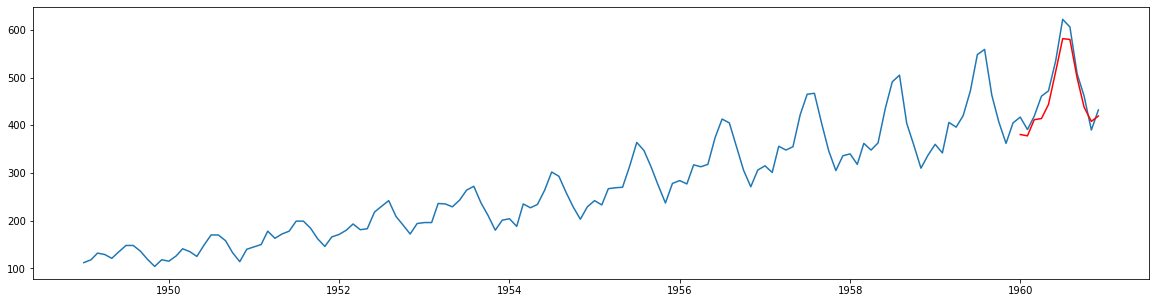

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['#Passengers'])
plt.plot(df_test.index, df_test['Predictions'], color= 'red')

In [34]:
train = df

scaler.fit(train)
train = scaler.transform(train)

n_input = 12 
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
  pred_list.append(model.predict(batch)[0])
  batch = np.append(batch[:, 1:,:], [[pred_list[i]]], axis=1)


Epoch 1/180
22/22 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 2/180
22/22 [==============================] - 0s 20ms/step - loss: 0.0015
Epoch 3/180
22/22 [==============================] - 0s 19ms/step - loss: 0.0012
Epoch 4/180
22/22 [==============================] - 0s 19ms/step - loss: 0.0014
Epoch 5/180
22/22 [==============================] - 0s 21ms/step - loss: 0.0013
Epoch 6/180
22/22 [==============================] - 0s 19ms/step - loss: 0.0016
Epoch 7/180
22/22 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 8/180
22/22 [==============================] - 0s 21ms/step - loss: 0.0014
Epoch 9/180
22/22 [==============================] - 0s 19ms/step - loss: 0.0018
Epoch 10/180
22/22 [==============================] - 0s 21ms/step - loss: 0.0024
Epoch 11/180
22/22 [==============================] - 1s 26ms/step - loss: 0.0030
Epoch 12/180
22/22 [==============================] - 1s 24ms/step - loss: 0.0015
Epoch 13/180
22/22 [=====

In [35]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 13)]
future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

In [36]:
future_dates.tail(12)

,#Passengers
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN
1961-10-01,NaN


In [37]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df, df_predict], axis=1)

In [38]:
df_proj.tail(14)

,#Passengers,Prediction
1960-11-01,390.0,NaN
1960-12-01,432.0,NaN
1961-01-01,NaN,423.580828
1961-02-01,NaN,407.996753
1961-03-01,NaN,431.443539
1961-04-01,NaN,467.523286
1961-05-01,NaN,494.686335
1961-06-01,NaN,573.605245
1961-07-01,NaN,654.928778
1961-08-01,NaN,632.379441


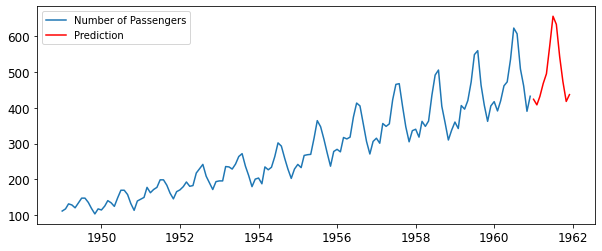

In [45]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index, df_proj['#Passengers'], label='Number of Passengers')
plt.plot(df_proj.index, df_proj['Prediction'], label='Prediction',color='red')
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()